# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
sns.set()

# Creating the training set

In [2]:
# initializing path
data_dir = Path('CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')
train_dir = data_dir

In [3]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [4]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')

In [5]:
# An empty list for inserting data into this list in (image_path, Label) format
train_data = []


In [6]:
# Labeling the Cyst case as 0
for img in Cyst_Cases:
    train_data.append((img, 0))

# Labeling the Normal case as 1
for img in Normal_Cases:
    train_data.append((img, 1))

# Labeling the Stone case as 2
for img in Stone_Cases:
    train_data.append((img, 2))

# Labeling the Tumor case as 3
for img in Tumor_Cases:
    train_data.append((img, 3))

In [7]:
# Making a data frame using pandas (creating CSV file)
train_data = pd.DataFrame(train_data, columns=['image', 'label'], index=None)

In [8]:
# Select random data row from the dataframe and show and index it.
train_data = train_data.sample(frac=1.).reset_index(drop=True)
train_data.head()

,image,label
0,CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Norm...,1
1,CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst...,0
2,CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Cyst...,0
3,CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Norm...,1
4,CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone\Tumo...,3


In [9]:
# Returns all the unique values of Label in train_data
train_data['label'].unique()

array([1, 0, 3, 2], dtype=int64)

In [10]:
# Returns number of rows and columns
train_data.shape

(12446, 2)

# Plotting dataset classes

In [11]:
# Getting the count of each class (Normal, Cyst, Tumor, Stone)
cases_count = train_data['label'].value_counts()
cases_count

label
1    5077
0    3709
3    2283
2    1377
Name: count, dtype: int64

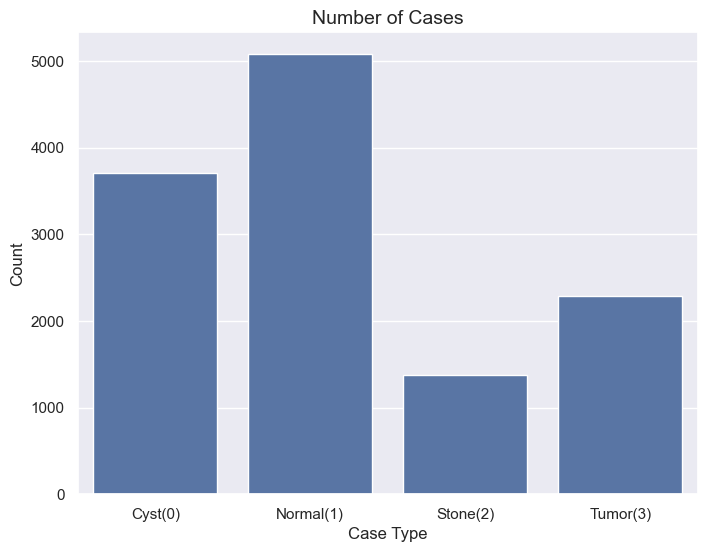

In [12]:
# Plotting the Graph 
plt.figure(figsize = (8,6))  # Size of graph
sns.barplot(x = cases_count.index, y = cases_count.values)
plt.title('Number of Cases', fontsize=14)
plt.xlabel('Case Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count.index)),['Cyst(0)', 'Normal(1)','Stone(2)','Tumor(3)'])
plt.show()

# CT Scanned

In [13]:
# Getting few samples for both the classes

# Gets 5 data from each cases
Cyst_Samples = (train_data[train_data['label'] == 0]['image'].iloc[:5]).tolist()
Normal_Samples = (train_data[train_data['label'] == 1]['image'].iloc[:5]).tolist()
Stone_Samples = (train_data[train_data['label'] == 2]['image'].iloc[:5]).tolist()
Tumor_Samples = (train_data[train_data['label'] == 3]['image'].iloc[:5]).tolist()

# Combining data in one variable
samples = Cyst_Samples + Normal_Samples + Stone_Samples + Tumor_Samples

del Cyst_Samples, Normal_Samples, Stone_Samples, Tumor_Samples

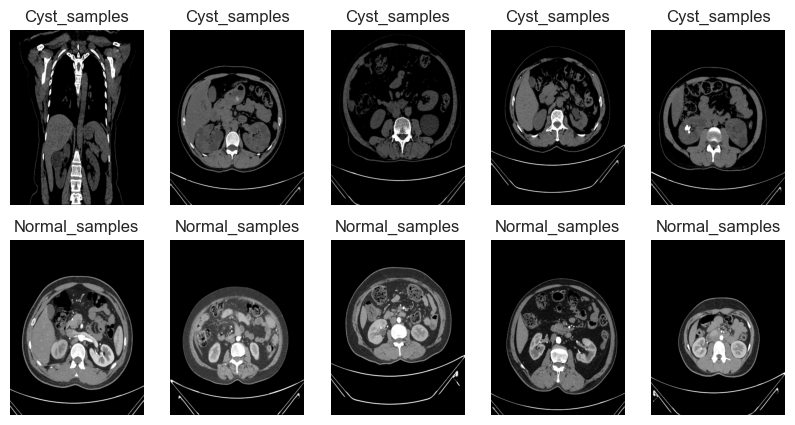

In [14]:
# Displaying the picture
f, ax = plt.subplots(2, 5,figsize=(10,5)) # Initilizing the graph where image is to be display

for i in range(10):
    img = imread(samples[i]) # reading the image
    ax[i//5, i%5].imshow(img, cmap='gray') # displaying the image
    
    # putting title in the images
    if i<5:
        ax[i//5, i%5].set_title("Cyst_samples")
    elif i<10:
        ax[i//5, i%5].set_title("Normal_samples")
    elif i<15:
        ax[i//5, i%5].set_title("Stone_samples")
    elif i<20:
        ax[i//5, i%5].set_title("Tumor_samples")
    
    # removing the scales in the graph
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')

plt.show()
    

In [15]:
# Get the path to the normal and pneumonia sub-directories
Normal_Cases_dir = train_dir / 'Normal'
Cyst_Cases_dir = train_dir / 'Cyst'
Stone_Cases_dir = train_dir / 'Stone'
Tumor_Cases_dir = train_dir / 'Tumor'

In [16]:
# Getting the list of all the images
Normal_Cases = Normal_Cases_dir.glob('*.jpg')
Cyst_Cases = Cyst_Cases_dir.glob('*.jpg')
Stone_Cases = Stone_Cases_dir.glob('*.jpg')
Tumor_Cases = Tumor_Cases_dir.glob('*.jpg')
train_data = []
train_labels = []

# Data Preprocessing

In [17]:
for img in Cyst_Cases:
    img = cv2.imread(str(img)) # Loading image
    img = cv2.resize(img, (28,28)) # resizing image 
    if img.shape[2] == 1: # Number of channel in the dimension.
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Changing image color
    img = np.array(img) # creating a numpy array
    img = img/255  # Normalization
    label = 'Cyst' 
    train_data.append(img)
    train_labels.append(label)

In [18]:
for img in Normal_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img,(28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = 'Normal'
    train_data.append(img)
    train_labels.append(label)

In [19]:
for img in Stone_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img,img,img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Stone"
    train_data.append(img)
    train_labels.append(label)

In [20]:
for img in Tumor_Cases:
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28,28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img/255
    label = "Tumor"
    train_data.append(img)
    train_labels.append(label)

In [21]:
train_data1 = np.array(train_data) # train_data or train_data1 is a 4D array from 3D image Array
train_labels1 = np.array(train_labels)
print('Total number of validation example: ', train_data1.shape)
print('Total number of Labels : ', train_labels1.shape)

Total number of validation example:  (12446, 28, 28, 3)
Total number of Labels :  (12446,)


In [22]:
train_data1[1]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.76862745, 0.76862745, 0.76862745],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [23]:
train_labels1 = pd.DataFrame(train_labels1, columns = ['label'],index=None)
train_labels1

,label
0,Cyst
1,Cyst
2,Cyst
3,Cyst
4,Cyst
...,...
12441,Tumor
12442,Tumor
12443,Tumor
12444,Tumor


In [24]:
train_labels1['label'].unique()


array(['Cyst', 'Normal', 'Stone', 'Tumor'], dtype=object)

In [25]:
train_labels1['label'] = train_labels1['label'].map({'Cyst':0,'Normal':1,'Stone':2,'Tumor':3})

In [26]:
print(train_data1.shape)
print(train_labels1.shape)

(12446, 28, 28, 3)
(12446, 1)


In [27]:
train_labels1.isnull().sum() # Checking for the missing(NULL) value in the labels1

label    0
dtype: int64

# Solving Image Dataset Imblance Using SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
smote = SMOTE() # Initilizing The SMOTE class
train_rows = len(train_data1) # getting total number or rows
train_data1 = train_data1.reshape(train_rows,-1)  # Converting 4D array to 2D Array
train_data2, train_labels2 = smote.fit_resample(train_data1,train_labels1) # Balancing Image Dataset using SMOTE

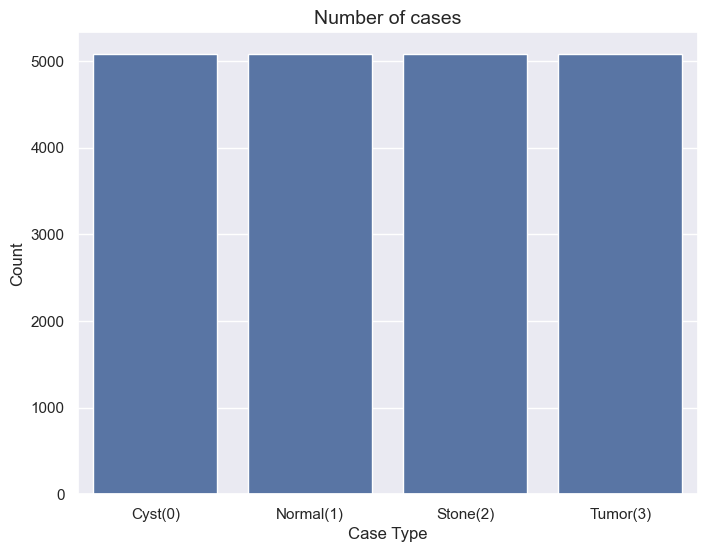

In [29]:
cases_count1 = train_labels2['label'].value_counts() # Counting values of diffrent image

#Plotting Graph for Label values
plt.figure(figsize=(8,6)) # Setting size of graph
sns.barplot(x=cases_count1.index, y=cases_count1.values)
plt.title('Number of cases', fontsize = 14)
plt.xlabel('Case Type',fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(range(len(cases_count1.index)), ['Cyst(0)', 'Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [30]:
train_data2.shape


(20308, 2352)

In [31]:
train_data2 = train_data2.reshape(-1,28,28,3) # Converting 2D array to 4D Array
train_data2.shape

(20308, 28, 28, 3)

In [32]:
train_data2[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

# Splitting the Dataset For training and testing and Validating using sklearn : train_test_split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size = 0.20,random_state = 42) # With random_state=42, we get the same train and test sets across different executions
X_train, X_val, y_train, y_val = train_test_split(train_data2, train_labels2, test_size = 0.10,random_state = 42)

In [34]:
print("Training Data X : ",X_train.shape)
print("Testing Data X : ",X_test.shape)
print("Training Data y : ",y_train.shape)
print("Testing Data y : ",y_test.shape)
print("Validating Data X : ",X_val.shape)
print("Validating Data y",y_val.shape)
print("Image Size : ",X_train[0].shape)

Training Data X :  (18277, 28, 28, 3)
Testing Data X :  (4062, 28, 28, 3)
Training Data y :  (18277, 1)
Testing Data y :  (4062, 1)
Validating Data X :  (2031, 28, 28, 3)
Validating Data y (2031, 1)
Image Size :  (28, 28, 3)


# Data Augmentation

In [35]:
import tensorflow as tf

In [36]:
data_augmentation = tf.keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=30, 
                    horizontal_flip=True)

# CNN

In [37]:
from tensorflow.keras import layers,models

In [38]:
model = models.Sequential([
        layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
#         layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten()

])
model.add(layers.Dense(4,activation='softmax'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 4)                


Epoch 1/3


572/572 [==============================] - 8s 12ms/step - loss: 0.5226 - accuracy: 0.8060 - val_loss: 0.1419 - val_accuracy: 0.9680
Epoch 2/3
572/572 [==============================] - 7s 12ms/step - loss: 0.0793 - accuracy: 0.9833 - val_loss: 0.0312 - val_accuracy: 0.9970
Epoch 3/3
572/572 [==============================] - 7s 12ms/step - loss: 0.0179 - accuracy: 0.9984 - val_loss: 0.0108 - val_accuracy: 1.0000


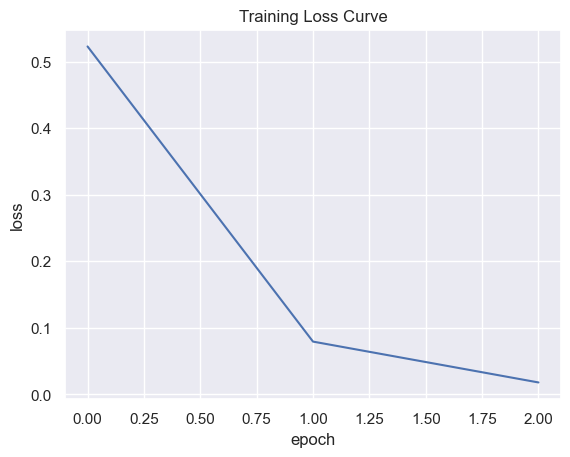

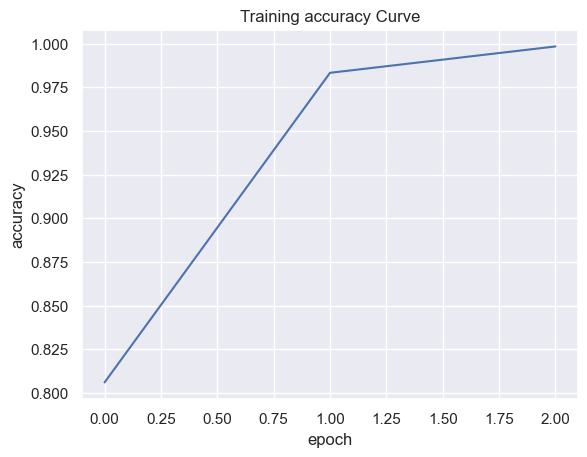

In [39]:
# Traning Model

#Compiling
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Fit
history = model.fit(np.array(X_train), np.array(y_train), epochs=3, validation_data=(np.array(X_val), np.array(y_val)))

# Graph for Loss 
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.title("Training Loss Curve")
plt.show()

# Graph for Accuracy 
plt.plot(history.history['accuracy'])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.title("Training accuracy Curve")
plt.show()

In [40]:
#Predicting Values

a = model.predict(X_test)
print(a)

127/127 [==============================] - 1s 5ms/step
[[8.6009729e-04 9.1960609e-01 1.1837012e-02 6.7696854e-02]
 [9.9921119e-01 3.3943183e-05 7.2320452e-04 3.1660806e-05]
 [5.1759388e-03 1.7468343e-04 9.9463683e-01 1.2528565e-05]
 ...
 [7.0648166e-05 5.6218111e-04 2.9874381e-03 9.9637979e-01]
 [9.9992490e-01 2.1956039e-06 4.9296632e-05 2.3560031e-05]
 [4.5038835e-04 1.7257462e-05 3.5166332e-07 9.9953198e-01]]


In [41]:
# Sparse to Dense
b = []
for i in a:
    if i[0] > i[1] and i[0] > i[2] and i[0] > i[3]:
        b.append(0)
    elif i[1] > i[0] and i[1] > i[2] and i[1] > i[3]:
        b.append(1)
    elif i[2] > i[1] and i[2] > i[0] and i[2] > i[3]:
        b.append(2)
    else:
        b.append(3)

print(b)

[1, 0, 2, 0, 0, 2, 0, 3, 1, 0, 0, 3, 3, 3, 1, 3, 0, 3, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 3, 2, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 0, 3, 1, 3, 3, 1, 2, 3, 2, 1, 0, 2, 2, 3, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 3, 2, 3, 3, 2, 3, 0, 2, 3, 2, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 3, 1, 2, 2, 1, 0, 3, 0, 1, 2, 2, 1, 2, 1, 3, 3, 1, 2, 3, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 3, 3, 2, 1, 0, 3, 2, 0, 2, 1, 3, 0, 0, 3, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 1, 3, 1, 0, 3, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 1, 3, 3, 0, 1, 0, 0, 1, 1, 1, 3, 3, 1, 2, 2, 0, 0, 2, 2, 3, 1, 3, 3, 3, 3, 2, 0, 1, 3, 0, 1, 3, 2, 1, 0, 3, 0, 0, 3, 2, 0, 3, 0, 2, 0, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 1, 0, 3, 0, 1, 1, 2, 1, 3, 0, 0, 1, 3, 2, 3, 2, 0, 2, 1, 2, 2, 3, 0, 2, 2, 1, 1, 0, 0, 1, 3, 0, 2, 2, 3, 1, 3, 2, 3, 1, 1, 0, 0, 0, 1, 1, 0, 3, 0, 3, 0, 3, 1, 2, 1, 2, 3, 0, 2, 2, 3, 1, 1, 3, 2, 3, 3, 0, 2, 1, 1, 0, 0, 3, 3, 3, 2, 1, 1, 2, 0, 3, 2, 2, 1, 0, 1, 2, 0, 3, 1, 2, 0, 3, 2, 3, 3, 1, 2, 

In [42]:
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.metrics import accuracy_score
print("Accuracy Score : ",accuracy_score(y_test,b))
cm = confusion_matrix(y_test, b)
print("\n\nConfusion Matrix : \n\n",cm)

Accuracy Score :  1.0


Confusion Matrix : 

 [[ 989    0    0    0]
 [   0 1041    0    0]
 [   0    0 1056    0]
 [   0    0    0  976]]


[Text(0, 0.5, 'Cyst'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Stone'),
 Text(0, 3.5, 'Tumor')]

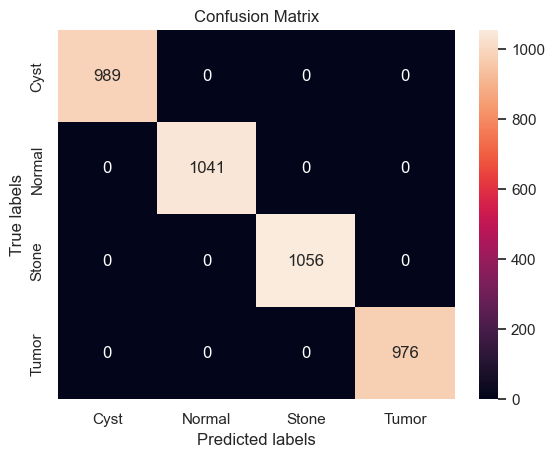

In [43]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor']) 
ax.yaxis.set_ticklabels(['Cyst', 'Normal','Stone','Tumor'])

In [44]:
print("F1 Score is :",f1_score(y_test,b,average='micro'))


F1 Score is : 1.0


In [45]:
pic = []
image='CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor/Tumor- (564).jpg'
img = cv2.imread(str(image))

In [46]:
img = cv2.resize(img, (28,28))
pic.append(img)
pic1 = np.array(pic)

In [47]:
a = model.predict(pic1)


1/1 [==============================] - 0s 130ms/step


In [48]:
if a.argmax() == 0 :
    print("The detected disease is \"Cyst\"")
elif a.argmax() == 1 :
    print("Kidney is \"Normal\" ")
elif a.argmax() == 2:
    print("The detected disease is \"Stone\"")
else:
    print("The detected disease is \"Tumor\"")

The detected disease is "Tumor"


In [50]:
model.save('Latest_model.h5')

In [ ]:

import tensorflowjs as tfjs 

In [ ]:
tfjs.converters.save_keras_model(model,"C:\Data_science_projects\Detection-and-Classification-of-Kidney-Diseases-Using-CT-Scanned-Image/model.h5")

In [64]:
pic1.shape

(1, 28, 28, 3)